In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
 
docs=[]
docs_names=[]

path="/content/drive/MyDrive/FYP/Text_Files"
dir_list = os.listdir(path)
print(dir_list)

for f in dir_list:
  with open(path+"/"+f, "r", encoding='Windows-1252') as file:
    data = file.read()
  data = data.replace("\n"," ")
  docs.append(data)
  docs_names.append(f)
  #print(f)

['A00-1000.pdf.txt', 'A00-1001.pdf.txt', 'A00-1002.pdf.txt', 'A00-1003.pdf.txt', 'A00-1004.pdf.txt', 'A00-1006.pdf.txt', 'A00-1005.pdf.txt', 'A00-1007.pdf.txt', 'A00-1008.pdf.txt', 'A00-1009.pdf.txt', 'A83-1018.pdf.txt', 'A83-1017.pdf.txt', 'A83-1019.pdf.txt', 'A83-1016.pdf.txt', 'A83-1020.pdf.txt', 'A83-1021.pdf.txt', 'A83-1033.pdf.txt', 'A88-1000.pdf.txt', 'A83-1032.pdf.txt', 'A88-1003.pdf.txt', 'A88-1002.pdf.txt', 'A88-1001.pdf.txt', 'A88-1004.pdf.txt', 'A88-1005.pdf.txt', 'A88-1006.pdf.txt', 'A88-1023.pdf.txt', 'A88-1025.pdf.txt', 'A88-1024.pdf.txt', 'A88-1021.pdf.txt', 'A88-1022.pdf.txt', 'A88-1026.pdf.txt', 'A88-1028.pdf.txt', 'A88-1027.pdf.txt', 'A92-1005.pdf.txt', 'A92-1004.pdf.txt', 'A92-1030.pdf.txt', 'A92-1031.pdf.txt', 'A92-1034.pdf.txt', 'A92-1036.pdf.txt', 'A92-1033.pdf.txt', 'A92-1032.pdf.txt', 'A92-1035.pdf.txt', 'A92-1043.pdf.txt', 'A94-1000.pdf.txt', 'A92-1038.pdf.txt', 'A92-1037.pdf.txt', 'A92-1044.pdf.txt', 'A92-1040.pdf.txt', 'A92-1041.pdf.txt', 'A92-1047.pdf.txt',

In [ ]:
vectorizer = TfidfVectorizer()

vectorizer.fit(docs)
X = vectorizer.transform(docs)

print(X.shape)

(500, 62880)


In [ ]:
from scipy.sparse import csr_matrix

S = csr_matrix(X)

# reconstruct dense matrix
Z = S.todense()

In [ ]:
df = pd.read_csv ('/content/drive/MyDrive/FYP/dataset.csv')

In [ ]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/FYP/saved_model/autoencoder.h5')

In [ ]:
import keras
from keras import *

# define an encoder model (without the decoder)
encoder = Model(inputs=model.input, outputs=model.layers[-9].output)

In [ ]:
compress = []
for i in range(len(Z)) :
  a = (encoder.predict(Z[i]).flatten())
  compress.append(a)

In [ ]:
Z = np.asarray(Z)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

sse=[]

for k in range(1, 10):
  kmeans= KMeans(n_clusters=k)
  kmeans.fit(compress)
  sse.append(kmeans.inertia_)

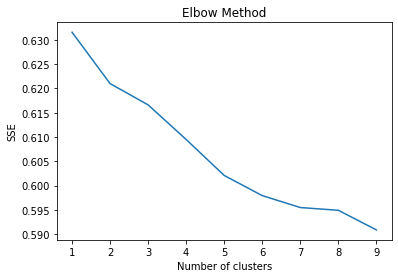

In [ ]:
from matplotlib import pyplot as plt

plt.plot(range(1, 10), sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [ ]:
from sklearn.cluster import KMeans

# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++')
y_kmeans = kmeans.fit_predict(compress)

In [ ]:
y_kmeans

array([2, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 2, 2, 1, 1, 3, 3, 1, 1, 1,
       1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 0, 4, 1, 2,
       1, 0, 4, 1, 4, 1, 0, 3, 2, 3, 4, 0, 4, 3, 3, 2, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 4, 0, 3, 4, 3, 3, 1, 4, 4, 4, 2, 0, 3, 3, 0, 0, 3, 3, 3,
       4, 0, 4, 4, 4, 4, 4, 2, 4, 4, 2, 4, 3, 0, 0, 4, 0, 4, 2, 2, 4, 4,
       4, 3, 4, 2, 3, 2, 0, 0, 0, 3, 0, 0, 3, 0, 3, 2, 0, 4, 4, 0, 0, 0,
       0, 4, 4, 3, 4, 4, 2, 4, 3, 4, 4, 3, 4, 4, 1, 1, 0, 0, 3, 3, 4, 3,
       0, 3, 0, 0, 4, 3, 0, 3, 4, 0, 4, 4, 1, 0, 1, 0, 3, 3, 4, 0, 4, 3,
       4, 1, 4, 1, 0, 4, 4, 4, 4, 1, 0, 0, 4, 1, 4, 4, 3, 4, 2, 2, 0, 4,
       4, 2, 3, 4, 4, 0, 2, 0, 4, 2, 2, 3, 4, 4, 0, 3, 0, 0, 0, 3, 0, 4,
       4, 4, 4, 2, 4, 3, 3, 4, 0, 0, 0, 3, 0, 3, 0, 0, 3, 4, 4, 0, 0, 4,
       3, 4, 0, 0, 0, 4, 4, 4, 2, 3, 0, 4, 3, 3, 0,

In [ ]:
with open('/content/drive/MyDrive/Dataset/D13-1047.pdf.txt', "r", encoding='Windows-1252') as file:
  d = file.read()
d = d.replace("\n"," ")

In [ ]:
d = [d]
dv = vectorizer.transform(d)

In [ ]:
from scipy.sparse import csr_matrix

q = csr_matrix(dv)

# reconstruct dense matrix
qq = q.todense()

In [ ]:
query = encoder.predict(qq)
query_doc = query.reshape(3930,)

In [ ]:
centroid = kmeans.cluster_centers_

In [ ]:
from scipy.spatial import distance

euc_dis = []
for i in centroid:
  dis = distance.euclidean(query_doc, i)
  euc_dis.append(dis)

euc_dis

[0.03888905938033165,
 0.03993283922060733,
 0.03905143684409875,
 0.039337811466444134,
 0.03833246815178015]

In [ ]:
k = euc_dis.index(max(euc_dis))
k

1

In [ ]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/FYP/saved_model/siamesemodel.h5')

In [ ]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 3930)]       0           []                               
                                                                                                  
 input_8 (InputLayer)           [(None, 3930)]       0           []                               
                                                                                                  
 concatenate_3 (Concatenate)    (None, 7860)         0           ['input_7[0][0]',                
                                                                  'input_8[0][0]']                
                                                                                                  
 dense_6 (Dense)                (None, 128)          1006208     ['concatenate_3[0][0]']    

In [ ]:
# DataFrame 
df1 = pd.DataFrame(docs_names, columns =['Document_Name'])  
df1['Document']= docs

In [ ]:
# p = K3[0].reshape(1,3930 )
query_doc = query_doc.reshape(1,3930 )

In [ ]:
#reshaped_compress = []

for i in range(len(compress)):
  compress[i]= compress[i].reshape(1,3930)

In [ ]:
df1['Cluster_id'] = y_kmeans
df1['Embedding'] = compress
df1

,Document_Name,Document,Cluster_id,Embedding
0,A00-1000.pdf.txt,Association for Computational Linguistics 6 ...,2,"[[0.03391464, 0.055153094, 0.05591745, 0.05591..."
1,A00-1001.pdf.txt,BusTUC - A natura l l anguage bus route o r...,1,"[[0.03394446, 0.0551945, 0.055940278, 0.055917..."
2,A00-1002.pdf.txt,Machine Translation of Very Close Languages J...,1,"[[0.03395431, 0.055310123, 0.055972204, 0.0559..."
3,A00-1003.pdf.txt,Abstract Cross-Language Multimedia Informatio...,1,"[[0.033944298, 0.055194207, 0.05594011, 0.0559..."
4,A00-1004.pdf.txt,Automatic construction of parallel English-Chi...,3,"[[0.03446201, 0.05600162, 0.057609826, 0.05808..."
...,...,...,...,...
495,D13-1055.pdf.txt,Proceedings of the 2013 Conference on Empirica...,4,"[[0.034074504, 0.055279747, 0.056228824, 0.056..."
496,D13-1058.pdf.txt,Proceedings of the 2013 Conference on Empirica...,4,"[[0.03393403, 0.055159763, 0.055928327, 0.0559..."
497,D13-1059.pdf.txt,Proceedings of the 2013 Conference on Empirica...,3,"[[0.033910938, 0.0556609, 0.056407537, 0.05608..."
498,D13-1084.pdf.txt,Proceedings of the 2013 Conference on Empirica...,0,"[[0.03391464, 0.055153094, 0.05596827, 0.05621..."


In [ ]:
similarity_index = []
source_doc_name=[]
source_doc=[]
for i in range(len(df1)):
  if(df1['Cluster_id'][i])==k:
    similarity_index.append(model.predict([query_doc, df1['Embedding'][i]]))
    source_doc_name.append(df1['Document_Name'][i])
    source_doc.append(df1['Document'][i]) 

In [ ]:
source_doc_name[0]

In [ ]:
similarity_index = np.array(similarity_index)
similarity_index = similarity_index.flatten()

In [ ]:
max_ind = np.argsort(similarity_index)[::-1][:10]
Document_Names=[source_doc_name[i] for i in max_ind]
Document= [source_doc[i] for i in max_ind]
Similarity_Index= similarity_index[max_ind]

In [ ]:
Document_Names

['A88-1025.pdf.txt',
 'A92-1005.pdf.txt',
 'A94-1007.pdf.txt',
 'A83-1020.pdf.txt',
 'D08-1034.pdf.txt',
 'A00-1005.pdf.txt',
 'A83-1019.pdf.txt',
 'A00-1002.pdf.txt',
 'A88-1021.pdf.txt',
 'A97-1046.pdf.txt']

In [ ]:
scores = np.array([100,67,92,87,66,89,76,22])

# Getting indices of N = 3 maximum values
x = np.argsort(scores)[::-1][:3]
print("Indices:",x)

# Getting N maximum values
print("Values:",scores[x])

Indices: [0 2 5]
Values: [100  92  89]


In [ ]:
df2 = pd.DataFrame(source_doc_name, columns =['Document_Name'])  
df2['Document']= source_doc
df2['Similarity Index']= similarity_index

In [ ]:
df2

,Document_Name,Document,Similarity Index
0,A00-1001.pdf.txt,BusTUC - A natura l l anguage bus route o r...,[[0.29583427]]
1,A00-1002.pdf.txt,Machine Translation of Very Close Languages J...,[[0.31488106]]
2,A00-1003.pdf.txt,Abstract Cross-Language Multimedia Informatio...,[[0.2799939]]
3,A00-1006.pdf.txt,Translation using Information on Dialogue Part...,[[0.2497865]]
4,A00-1005.pdf.txt,PartslD: A Dialogue-Based System for Identifyi...,[[0.32182938]]
...,...,...,...
78,D09-1136.pdf.txt,Proceedings of the 2009 Conference on Empirica...,[[0.25212586]]
79,D09-1142.pdf.txt,Proceedings of the 2009 Conference on Empirica...,[[0.27874833]]
80,D09-1145.pdf.txt,Proceedings of the 2009 Conference on Empirica...,[[0.29945737]]
81,D12-1008.pdf.txt,Proceedings of the 2012 Joint Conference on Em...,[[0.28372908]]
